# **Laboratorijska vježba 7**: Zadaci za samostalni rad

## **Predviđanje udomljavanja životinja**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka koji sadrži podatke o životinjama iz skloništa za životinje. Cilj je izgraditi i trenirati algoritam strojnog učenja koji će predvidjeti hoće li životinja iz skloništa biti udomljena ili ne. Skup podataka sadrži sljedeće značajke:

* animal_type - tip životinje
* intake_year - godina primanja u sklonište
* intake_condition - stanje životinje pri primanju u sklonište
* intake_number - broj slučajeva kada je ista životinja dovedena u sklonište
* intake_type - tip donošenja u sklonište (primjerice, zalutala životinja, dobrovoljna predaja vlasnika,...)
* sex_upon_intake - spol životinje i informacija o kastriranju pri primanju
* age_upon_intake - dob životinje pri primanju
* time_in_shelter_days - broj dana koja je životinja provela u skloništu
* sex_upon_outcome - spol životinje i informacija o kastriranju pri donošenju odluke o udomljavanju
* age_upon_outcome - dob životinje pri donošenju odluke o udomljavanju
* outcome_type - odluka o udomljavanju

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import seaborn as sn
%matplotlib inline

data_folder = './Data/'

In [ ]:
data = pd.read_csv('Data/aac_intakes_outcomes.csv')
data = data[['animal_type', 'intake_year', 'intake_condition', 'intake_number', 'intake_type', 'sex_upon_intake', 'age_upon_intake_(years)', 'time_in_shelter_days', 'sex_upon_outcome', 'age_upon_outcome_(years)', 'outcome_type']]
data

animal_type  intake_year intake_condition  intake_number  \
0             Dog         2017           Normal            1.0   
1             Dog         2014           Normal            2.0   
2             Dog         2014           Normal            3.0   
3             Dog         2014           Normal            1.0   
4             Dog         2013          Injured            1.0   
...           ...          ...              ...            ...   
79667         Cat         2018           Normal            1.0   
79668       Other         2018           Normal            1.0   
79669       Other         2018           Normal            1.0   
79670         Dog         2018           Normal            1.0   
79671         Dog         2018             Aged            1.0   

           intake_type sex_upon_intake  age_upon_intake_(years)  \
0                Stray   Neutered Male                10.000000   
1        Public Assist   Neutered Male                 7.000000   
2        Public Assist   Neutered Male                 6.000000   
3      Owner Surrender   Neutered Male                10.000000   
4        Public Assist   Neutered Male                16.000000   
...                ...             ...                      ...   
79667            Stray         Unknown                 0.038356   
79668         Wildlife         Unknown                 2.000000   
79669         Wildlife         Unknown                 1.000000   
79670            Stray     Intact Male                 0.410959   
79671            Stray   Spayed Female                10.000000   

       time_in_shelter_days sex_upon_outcome  age_upon_outcome_(years)  \
0                  0.588194    Neutered Male                 10.000000   
1                  1.259722    Neutered Male                  7.000000   
2                  1.113889    Neutered Male                  6.000000   
3                  4.970139    Neutered Male                 10.000000   
4                  0.119444    Neutered Male                 16.000000   
...                     ...              ...                       ...   
79667              0.077083          Unknown                  0.038356   
79668              0.053472          Unknown                  2.000000   
79669              0.047917          Unknown                  1.000000   
79670              1.762500      Intact Male                  0.821918   
79671              0.813889    Spayed Female                 10.000000   

          outcome_type  
0      Return to Owner  
1      Return to Owner  
2      Return to Owner  
3             Transfer  
4      Return to Owner  
...                ...  
79667         Transfer  
79668       Euthanasia  
79669       Euthanasia  
79670  Return to Owner  
79671       Euthanasia  

[79672 rows x 11 columns]

## **Zadatak 1: Transformacija značajki**

Uredite skup podataka na način da rukujete s nedostajućim vrijednostima. Provjerite ima li takvih vrijednosti te ih uklonite ili nadomjestite prikladnim vrijednostima.



In [ ]:
# Mjesto za Vaš kod
print(data.isnull().sum())
data.dropna(inplace=True)


animal_type                  0
intake_year                  0
intake_condition             0
intake_number                0
intake_type                  0
sex_upon_intake              1
age_upon_intake_(years)      0
time_in_shelter_days         0
sex_upon_outcome             1
age_upon_outcome_(years)     0
outcome_type                10
dtype: int64


Prebacite kategoričke i ordinalne značajke u numeričke pomoću *one-hot encoding* tehnike.

In [ ]:
# Mjesto za Vaš kod
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
categorical_cols = ['animal_type', 'intake_condition', 'intake_type', 'sex_upon_intake']
for col in categorical_cols:
  encoded = ohe.fit_transform(data[[col]]).toarray()
  data[ohe.categories_[0]] = encoded
data.drop(columns=categorical_cols, inplace=True)
encoded = ohe.fit_transform(data[['sex_upon_outcome']]).toarray()
sex_upon_outcome = []
for string in ohe.categories_[0]:
  sex_upon_outcome.append(string + ' outcome')
data[sex_upon_outcome] = encoded
data.drop('sex_upon_outcome', axis=1, inplace=True)
outcome_types = np.unique(data['outcome_type'].to_numpy())
print(outcome_types)
data['outcome_type'] = data['outcome_type'].replace(outcome_types, [1,0,0,0,0,0,1,1,0]).copy()
data


['Adoption' 'Died' 'Disposal' 'Euthanasia' 'Missing' 'Relocate'
 'Return to Owner' 'Rto-Adopt' 'Transfer']


intake_year  intake_number  age_upon_intake_(years)  \
0             2017            1.0                10.000000   
1             2014            2.0                 7.000000   
2             2014            3.0                 6.000000   
3             2014            1.0                10.000000   
4             2013            1.0                16.000000   
...            ...            ...                      ...   
79667         2018            1.0                 0.038356   
79668         2018            1.0                 2.000000   
79669         2018            1.0                 1.000000   
79670         2018            1.0                 0.410959   
79671         2018            1.0                10.000000   

       time_in_shelter_days  age_upon_outcome_(years)  outcome_type  Bird  \
0                  0.588194                 10.000000             1   0.0   
1                  1.259722                  7.000000             1   0.0   
2                  1.113889                  6.000000             1   0.0   
3                  4.970139                 10.000000             0   0.0   
4                  0.119444                 16.000000             1   0.0   
...                     ...                       ...           ...   ...   
79667              0.077083                  0.038356             0   0.0   
79668              0.053472                  2.000000             0   0.0   
79669              0.047917                  1.000000             0   0.0   
79670              1.762500                  0.821918             1   0.0   
79671              0.813889                 10.000000             0   0.0   

       Cat  Dog  Other  ...  Intact Female  Intact Male  Neutered Male  \
0      0.0  1.0    0.0  ...            0.0          0.0            1.0   
1      0.0  1.0    0.0  ...            0.0          0.0            1.0   
2      0.0  1.0    0.0  ...            0.0          0.0            1.0   
3      0.0  1.0    0.0  ...            0.0          0.0            1.0   
4      0.0  1.0    0.0  ...            0.0          0.0            1.0   
...    ...  ...    ...  ...            ...          ...            ...   
79667  1.0  0.0    0.0  ...            0.0          0.0            0.0   
79668  0.0  0.0    0.0  ...            0.0          0.0            0.0   
79669  0.0  0.0    0.0  ...            0.0          0.0            0.0   
79670  0.0  1.0    0.0  ...            0.0          1.0            0.0   
79671  0.0  1.0    0.0  ...            0.0          0.0            0.0   

       Spayed Female  Unknown  Intact Female outcome  Intact Male outcome  \
0                0.0      0.0                    0.0                  0.0   
1                0.0      0.0                    0.0                  0.0   
2                0.0      0.0                    0.0                  0.0   
3                0.0      0.0                    0.0                  0.0   
4                0.0      0.0                    0.0                  0.0   
...              ...      ...                    ...                  ...   
79667            0.0      1.0                    0.0                  0.0   
79668            0.0      1.0                    0.0                  0.0   
79669            0.0      1.0                    0.0                  0.0   
79670            0.0      0.0                    0.0                  1.0   
79671            1.0      0.0                    0.0                  0.0   

       Neutered Male outcome  Spayed Female outcome  Unknown outcome  
0                        1.0                    0.0              0.0  
1                        1.0                    0.0              0.0  
2                        1.0                    0.0              0.0  
3                        1.0                    0.0              0.0  
4                        1.0                    0.0              0.0  
...                      ...                    ...              ...  
79667                    0

Normalizirajte vrijednosti svih značajki u interval $[0,1]$. 

In [ ]:
# Mjesto za Vaš kod
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data


intake_year  intake_number  age_upon_intake_(years)  \
0              0.8       0.000000                 0.400000   
1              0.2       0.083333                 0.280000   
2              0.2       0.166667                 0.240000   
3              0.2       0.000000                 0.400000   
4              0.0       0.000000                 0.640000   
...            ...            ...                      ...   
79656          1.0       0.000000                 0.001534   
79657          1.0       0.000000                 0.080000   
79658          1.0       0.000000                 0.040000   
79659          1.0       0.000000                 0.016438   
79660          1.0       0.000000                 0.400000   

       time_in_shelter_days  age_upon_outcome_(years)  outcome_type  Bird  \
0                  0.000366                  0.400000           1.0   0.0   
1                  0.000784                  0.280000           1.0   0.0   
2                  0.000693                  0.240000           1.0   0.0   
3                  0.003094                  0.400000           0.0   0.0   
4                  0.000074                  0.640000           1.0   0.0   
...                     ...                       ...           ...   ...   
79656              0.000048                  0.001534           0.0   0.0   
79657              0.000033                  0.080000           0.0   0.0   
79658              0.000030                  0.040000           0.0   0.0   
79659              0.001097                  0.032877           1.0   0.0   
79660              0.000507                  0.400000           0.0   0.0   

       Cat  Dog  Other  ...  Intact Female  Intact Male  Neutered Male  \
0      0.0  1.0    0.0  ...            0.0          0.0            1.0   
1      0.0  1.0    0.0  ...            0.0          0.0            1.0   
2      0.0  1.0    0.0  ...            0.0          0.0            1.0   
3      0.0  1.0    0.0  ...            0.0          0.0            1.0   
4      0.0  1.0    0.0  ...            0.0          0.0            1.0   
...    ...  ...    ...  ...            ...          ...            ...   
79656  1.0  0.0    0.0  ...            0.0          0.0            0.0   
79657  0.0  0.0    0.0  ...            0.0          0.0            0.0   
79658  0.0  0.0    0.0  ...            0.0          0.0            0.0   
79659  0.0  1.0    0.0  ...            0.0          1.0            0.0   
79660  0.0  1.0    0.0  ...            0.0          0.0            0.0   

       Spayed Female  Unknown  Intact Female outcome  Intact Male outcome  \
0                0.0      0.0                    0.0                  0.0   
1                0.0      0.0                    0.0                  0.0   
2                0.0      0.0                    0.0                  0.0   
3                0.0      0.0                    0.0                  0.0   
4                0.0      0.0                    0.0                  0.0   
...              ...      ...                    ...                  ...   
79656            0.0      1.0                    0.0                  0.0   
79657            0.0      1.0                    0.0                  0.0   
79658            0.0      1.0                    0.0                  0.0   
79659            0.0      0.0                    0.0                  1.0   
79660            1.0      0.0                    0.0                  0.0   

       Neutered Male outcome  Spayed Female outcome  Unknown outcome  
0                        1.0                    0.0              0.0  
1                        1.0                    0.0              0.0  
2                        1.0                    0.0              0.0  
3                        1.0                    0.0              0.0  
4                        1.0                    0.0              0.0  
...                      ...                    ...              ...  
79656                    0

## **Zadatak 2: Odabir modela**

Za uređeni skup podataka provedite odabir modela. Prvo podijelite skup podataka na podskupove za treniranje i testiranje u omjeru 80:20. Zatim definirajte mrežu hiperparametara za četiri klasifikatora: DT, SVM, $k$-NN i logističku regresiju.

In [ ]:
# Mjesto za Vaš kod
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

X = data.loc[:, data.columns != 'outcome_type'].copy()
y = data['outcome_type'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

DT = tree.DecisionTreeClassifier()
tree_parameters = {'max_depth': [5,10,15]}
clf_tree = GridSearchCV(DT, tree_parameters, scoring='accuracy')
clf_tree.fit(X_train, y_train)


KNN = KNeighborsClassifier()
KNN_parameters = {'n_neighbors': [5,6,7,8]}
clf_KNN = GridSearchCV(KNN, KNN_parameters, scoring='accuracy')
clf_KNN.fit(X_train, y_train)


LogReg = LogisticRegression(max_iter=1000)
LogReg_parameters = {'C': [0.5,1,2,5,10,20]}
clf_LogReg = GridSearchCV(LogReg, LogReg_parameters, scoring='accuracy')
clf_LogReg.fit(X_train, y_train)

# SVC = SVC()
# SVC_parameters = {'kernel': ('linear', 'rbf'), 'C': [1,5,10,50,100]}
# clf_SVC = GridSearchCV(SVC, SVC_parameters, scoring='accuracy')
# clf_SVC.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.5, 1, 2, 5, 10, 20]}, scoring='accuracy')

Na podskupu za treniranje isprobajte sve kombinacije hiperparametara te usporedite najbolje kombinacije za svaki klasifikator na podskupu za testiranje. Odaberite prikladnu mjeru za usporedbu performansi. Možete koristiti klasu GridSearchCV te podijeliti podskup za trening postupkom unakrsne provjere $5$ preklopa. 

In [ ]:
# Mjesto za Vaš kod
y_pred = clf_tree.predict(X_test)
print("Tree na testu: ", accuracy_score(y_test, y_pred))

y_pred = clf_KNN.predict(X_test)
print("KNN na testu: ", accuracy_score(y_test, y_pred))

y_pred = clf_LogReg.predict(X_test)
print("LogReg na testu: ", accuracy_score(y_test, y_pred))

# y_pred = clf_SVC.predict(X_test)
# print("CAC na testu: ", accuracy_score(y_test, y_pred))

Tree na testu:  0.8415238812527459
KNN na testu:  0.8292851314881065
LogReg na testu:  0.8194313688570891


Prokomentirajte dobivene rezultate. Koji klasifikator ima najbolje performanse?

## **Zadatak 3: Odabir značajki - filtri**

Podijelite uređeni skup podataka na podskupove za treniranje i testiranje u omjeru 80:20 (koristite isto stanje nasumičnosti kao i u Zadatku 2).

In [ ]:
# Mjesto za Vaš kod
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

Pomoću proizvoljnog filtra provedite odabir značajki za promatrani skup podataka. Rangirajte sve značajki na temelju vrijednosti mjere unutar filtra te iscrtajte stupčasti dijagram tih vrijednosti. 

Odaabrane značajke: 
['Cat' 'Dog' 'Normal' 'Sick' 'Wildlife' 'Neutered Male' 'Spayed Female'
 'Unknown' 'Intact Female outcome' 'Intact Male outcome'
 'Neutered Male outcome' 'Spayed Female outcome' 'Unknown outcome']
Odaabrane značajke: 
['intake_number' 'time_in_shelter_days' 'age_upon_outcome_(years)']
Tree na testu:  0.8331136634657629


<BarContainer object of 5 artists>

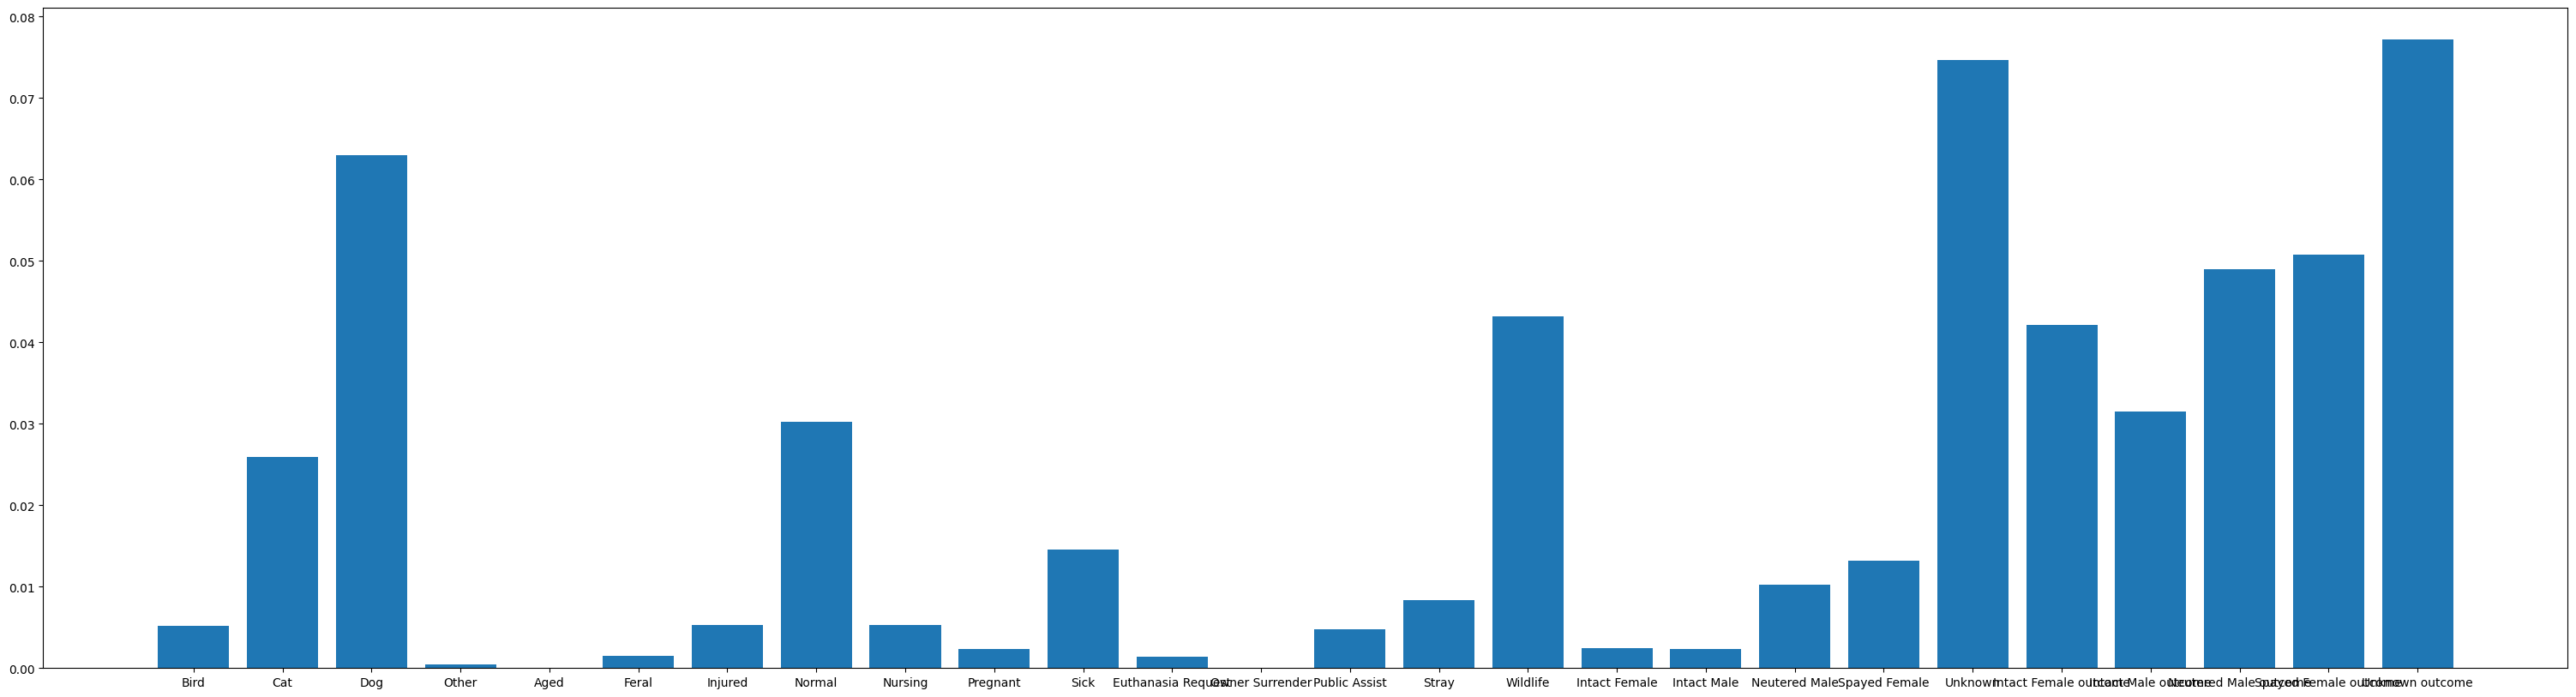

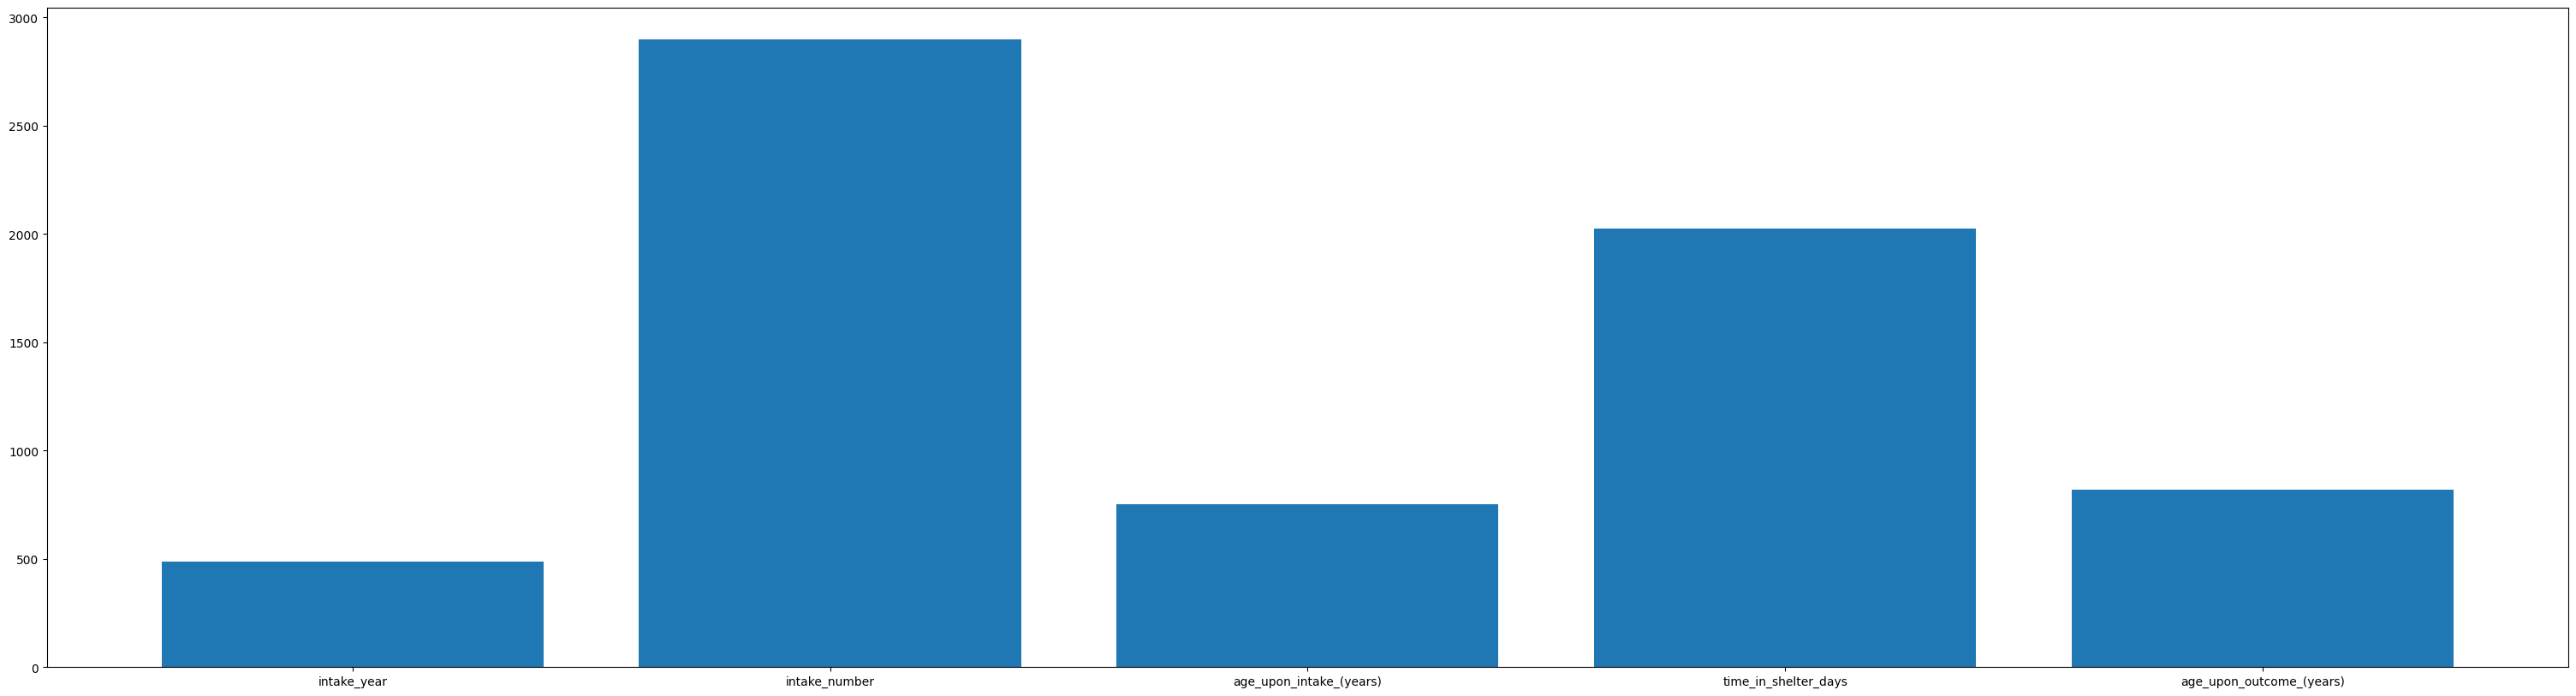

In [ ]:
# Mjesto za Vaš kod
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif

skb_categorical = SelectKBest(mutual_info_classif, k=13)
X_categorical = X.iloc[:, 5:]
X_new_categorical = skb_categorical.fit_transform(X_categorical,y)
print("Odaabrane značajke: ")
print(skb_categorical.get_feature_names_out())

skb_numerical = SelectKBest(f_classif, k=3)
X_numerical = X.iloc[:, 0:5]
X_new_numerical = skb_numerical.fit_transform(X_numerical,y)
print("Odaabrane značajke: ")
print(skb_numerical.get_feature_names_out())

X_important = np.concatenate((skb_categorical.get_feature_names_out(), skb_numerical.get_feature_names_out()))
X_train_important = X_train[X_important].copy()
X_test_important = X_test[X_important].copy()

clf_tree.fit(X_train_important, y_train)
y_pred = clf_tree.predict(X_test_important)
print("Tree na testu: ", accuracy_score(y_test, y_pred))

plt.figure(figsize=(38,10))
plt.bar(X_categorical.columns, skb_categorical.scores_)

plt.figure(figsize=(38,10))
plt.bar(X_numerical.columns, skb_numerical.scores_)

Odaberite $K$ najbolje rangiranih značajki te trenirajte klasifikatore na podskupu za treniranje koristeći odabrane značajke. Možete koristiti najbolje klasifikatore iz Zadatka 2. Samostalno odaberite prikladnu vrijednost za $K$. Usporedite performanse ovih klasifikatora na podskupu za testiranje prije i nakon odabira značajki.  

## **Zadatak 4: Odabir značajki - omotači**


Podijelite uređeni skup podataka na podskupove za treniranje i testiranje u omjeru 80:20 (koristite isto stanje nasumičnosti kao i u Zadatku 2). Zatim dodatno podijelite podskup za treniranje na podskupove za treniranje i vrednovanje u omjeru 65:35. 

In [ ]:
# Mjesto za Vaš kod
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)
X_train_v, X_validation, y_train_v, y_validation = train_test_split(X_train, y_train, test_size=0.35, random_state=2)

Pomoću omotača SFS provedite odabir značajki za promatrani skup podataka. Isprobajte nekoliko različitih vrijednosti za konačan broj značajki, vodeći se performansama klasifikatora. Možete koristiti najbolji klasifikator iz Zadatka 2 za vrednovanje podskupova značajki. Napomena: klasifikator trenirajte na podskupu za trening, a podskupove značajki koje stvara SFS vrednujte na podskupu za vrednovanje.

In [ ]:
# Mjesto za Vaš kod
from sklearn.feature_selection import SequentialFeatureSelector

clf_tree.fit(X_train_v, y_train_v)
print("Prije FS: ", accuracy_score(y_validation, clf_tree.predict(X_validation)))

sfs = SequentialFeatureSelector(tree.DecisionTreeClassifier(max_depth=clf_tree.best_params_['max_depth']), n_features_to_select=15, direction='forward').fit(X_train,y_train)
selected_features = X_train_v.columns[sfs.support_]

clf_tree.fit(X_train_v[selected_features], y_train_v)
print("Nakon FS: ", accuracy_score(y_validation, clf_tree.predict(X_validation[selected_features])))

Prije FS:  0.8449674960771127
Nakon FS:  0.8462676529926025


Najbolje klasifikatore iz Zadatka 2 trenirajte na objedinjenom podskupu za treniranje i vrednovanje, koristeći odabrane značajke iz ovog zadatka. Usporedite performanse ovih klasifikatora na podskupu za testiranje prije i nakon odabira značajki.

In [ ]:
# Mjesto za Vaš kod
clf_tree.fit(X_train[selected_features], y_train)
print("Nakon omotača: ", accuracy_score(y_test, clf_tree.predict(X_test[selected_features])))

Nakon omotača:  0.8417749325299693


## **Zadatak 5: Preuzorkovanje**

Podijelite uređeni skup podataka na podskupove za treniranje i testiranje u omjeru 80:20 (koristite isto stanje nasumičnosti kao i u Zadatku 2).

In [ ]:
# Mjesto za Vaš kod
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

Pomoću metode nasumičnog preuzorkovanja provedite preuzorkovanje podskupa za treniranje.

In [ ]:
# Mjesto za Vaš kod
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
X_new_train, y_new_train = oversample.fit_resample(X_train, y_train)

clf_tree.fit(X_new_train, y_new_train)
y_pred = clf_tree.predict(X_test)
print("Tree na testu: ", accuracy_score(y_test, y_pred))

Tree na testu:  0.8301638109583882


Najbolje klasifikatore iz Zadatka 2 trenirajte na preuzorkovanom podskupu za treniranje. Usporedite performanse ovih klasifikatora na podskupu za testiranje prije i nakon preuzorkovanja. 